<a href="https://colab.research.google.com/github/safitrisoetam/Bangkit-Capstone-Project/blob/main/SmoothenTheGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

Initial_Model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in Initial_Model.layers:
  layer.trainable = False

Initial_Model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
x = Initial_Model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers. Dense (4, activation='softmax')(x)

model = Model(Initial_Model.input, x)
model.compile(optimizer = SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Natural Disaster Dataset/Training'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    target_size=(224, 224)
)

VALIDATION_DIR = '/content/drive/MyDrive/Natural Disaster Dataset/Testing'
validation_datagen = ImageDataGenerator(rescale= 1./255.)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    target_size=(224, 224)
)


Found 2581 images belonging to 4 classes.
Found 991 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 40,
                    validation_steps = 15,
                    epochs=100,
                    verbose=2,
                    validation_data=validation_generator)

Epoch 1/100
40/40 - 103s - loss: 0.6073 - accuracy: 0.7835 - val_loss: 0.6231 - val_accuracy: 0.7854
Epoch 2/100
40/40 - 102s - loss: 0.6045 - accuracy: 0.7771 - val_loss: 0.5701 - val_accuracy: 0.8094
Epoch 3/100
40/40 - 102s - loss: 0.5843 - accuracy: 0.7843 - val_loss: 0.5490 - val_accuracy: 0.8073
Epoch 4/100
40/40 - 101s - loss: 0.5766 - accuracy: 0.7934 - val_loss: 0.5794 - val_accuracy: 0.8094
Epoch 5/100
40/40 - 102s - loss: 0.5573 - accuracy: 0.7946 - val_loss: 0.5877 - val_accuracy: 0.7979
Epoch 6/100
40/40 - 101s - loss: 0.5434 - accuracy: 0.8037 - val_loss: 0.5599 - val_accuracy: 0.8198
Epoch 7/100
40/40 - 102s - loss: 0.5434 - accuracy: 0.8053 - val_loss: 0.5316 - val_accuracy: 0.8125
Epoch 8/100
40/40 - 102s - loss: 0.5189 - accuracy: 0.8129 - val_loss: 0.5045 - val_accuracy: 0.8313
Epoch 9/100
40/40 - 102s - loss: 0.5243 - accuracy: 0.8002 - val_loss: 0.5086 - val_accuracy: 0.8292
Epoch 10/100
40/40 - 102s - loss: 0.5184 - accuracy: 0.8149 - val_loss: 0.5153 - val_accura

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path=fn
  img=image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('Cyclone')
  elif classes[0][1]==1:
    print('Earthquake')
  elif classes[0][2]==1:
    print('Flood')
  elif classes[0][3]==1:
    print('Wildfire')
  else:
    print('Could not detect')

Saving 1.jpg to 1.jpg
1.jpg
[[6.5549868e-01 8.9201802e-07 3.4450042e-01 3.4383011e-24]]
Could not detect


In [ ]:
 if classes[0][0]>classes[0][1]:
    if classes[0][0]>classes[0][2]:
          if classes[0][0]>classes[0][3]:
            print('Cyclone')
    elif classes[0][0]>classes[0][3]:
          if classes[0][0]>classes[0][2]:
            print('Cyclone')
  elif classes[0][0]>classes[0][2]:
    if classes[0][0]>classes[0][1]:
          if classes[0][0]>classes[0][3]:
            print('Cyclone')
    elif classes[0][0]>classes[0][3]:
          if classes[0][0]>classes[0][1]:
            print('Cyclone')
  elif classes[0][0]>classes[0][3]:
    if classes[0][0]>classes[0][1]:
          if classes[0][0]>classes[0][2]:
            print('Cyclone')
    elif classes[0][0]>classes[0][2]:
          if classes[0][0]>classes[0][1]:
            print('Cyclone')

Text(0.5, 1.0, 'Training and validation loss')

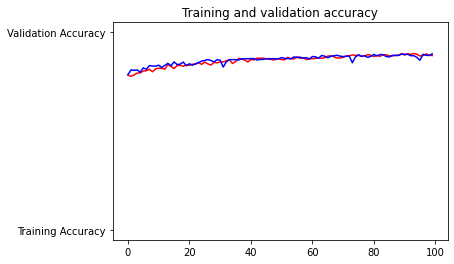

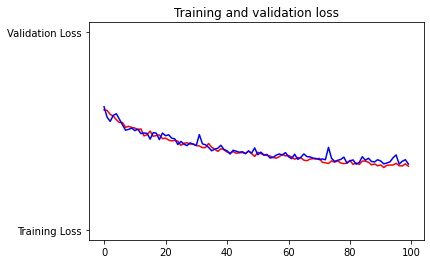

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
tf.keras.models.save_model(
  model, '/content/drive/MyDrive/Capstone/Disaster_Prediction3'
)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone/Disaster_Prediction3/assets


In [ ]:
model.save('/content/drive/MyDrive/Capstone/classification_model3.h5')
